In [ ]:
# Description: This program gets the sentiment of Bitcoin from Twtter users

In [ ]:
# Install dependencies
! pip install -U snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the Libraries
import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
query = 'bitcoin'
tweets = []
limit = 5000

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  #print(tweet, type(tweet))
  #print(vars(tweet))
  #break
  if len(tweets) == limit:
    #print(vars(tweet))
    break
  tweets.append([tweet.date, tweet.username, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Text'])

In [ ]:
df

,Date,User,Text
0,2022-06-23 18:29:02+00:00,BitSwings,[1D] #Bitcoin market is strongly trending down...
1,2022-06-23 18:29:01+00:00,cryptosignal_sl,♨️♨️♨️LONG♨️♨️♨️\n\n🛑#UNI\n🛑Entry Price = 5.26...
2,2022-06-23 18:29:00+00:00,TheDesertLynx,@AgoristView @SallyMayweather @saylor Not ever...
3,2022-06-23 18:28:59+00:00,GrayGeorge29,Sign up for Coinbase using my link and we can ...
4,2022-06-23 18:28:59+00:00,ForbesCrypto,Bitcoin Miners Face Pressure To Sell Off Holdi...
...,...,...,...
4995,2022-06-23 16:56:02+00:00,gautambhowmick2,Bitcoin (BTC) is the largest cryptocurrency in...
4996,2022-06-23 16:56:01+00:00,CryptoSignal_LS,📉📉📉SHORT📉📉📉\n\n💰#AAVE\n💰Entry Price = 63.14\n💰...
4997,2022-06-23 16:56:01+00:00,cryptosignal_sl,♨️♨️♨️LONG♨️♨️♨️\n\n🛑#SOL\n🛑Entry Price = 36.8...
4998,2022-06-23 16:56:01+00:00,CYL368464,OpenSea announced a partnership with Solana bl...


In [ ]:
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) # Removes the # from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt) # Removes the # from Bitcoin
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # Removes any strings with a '#'
  twt = re.sub('\\n', '', twt) # Removes the '\n' chars
  twt = re.sub('http?:\/\/\S+', '', twt) # Removes any hyperlinks
  return twt

In [ ]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Text'].apply(cleanTwt)
#Show the dataset
df.head()

,Date,User,Text,Cleaned_Tweets
0,2022-06-23 18:29:02+00:00,BitSwings,[1D] #Bitcoin market is strongly trending down...,[1D] Bitcoin market is strongly trending down ...
1,2022-06-23 18:29:01+00:00,cryptosignal_sl,♨️♨️♨️LONG♨️♨️♨️\n\n🛑#UNI\n🛑Entry Price = 5.26...,♨️♨️♨️LONG♨️♨️♨️🛑🛑Entry Price = 5.264🛑Stop Los...
2,2022-06-23 18:29:00+00:00,TheDesertLynx,@AgoristView @SallyMayweather @saylor Not ever...,@AgoristView @SallyMayweather @saylor Not ever...
3,2022-06-23 18:28:59+00:00,GrayGeorge29,Sign up for Coinbase using my link and we can ...,Sign up for Coinbase using my link and we can ...
4,2022-06-23 18:28:59+00:00,ForbesCrypto,Bitcoin Miners Face Pressure To Sell Off Holdi...,Bitcoin Miners Face Pressure To Sell Off Holdi...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#Create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create two new columns called 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#Shwo the data
df.head()

,Date,User,Text,Cleaned_Tweets,Subjectivity,Polarity
0,2022-06-23 18:29:02+00:00,BitSwings,[1D] #Bitcoin market is strongly trending down...,[1D] Bitcoin market is strongly trending down ...,0.480556,0.225694
1,2022-06-23 18:29:01+00:00,cryptosignal_sl,♨️♨️♨️LONG♨️♨️♨️\n\n🛑#UNI\n🛑Entry Price = 5.26...,♨️♨️♨️LONG♨️♨️♨️🛑🛑Entry Price = 5.264🛑Stop Los...,0.000000,0.000000
2,2022-06-23 18:29:00+00:00,TheDesertLynx,@AgoristView @SallyMayweather @saylor Not ever...,@AgoristView @SallyMayweather @saylor Not ever...,0.750000,0.250000
3,2022-06-23 18:28:59+00:00,GrayGeorge29,Sign up for Coinbase using my link and we can ...,Sign up for Coinbase using my link and we can ...,0.000000,0.000000
4,2022-06-23 18:28:59+00:00,ForbesCrypto,Bitcoin Miners Face Pressure To Sell Off Holdi...,Bitcoin Miners Face Pressure To Sell Off Holdi...,0.000000,0.000000


In [ ]:
#Create a function to get the text sentiment
def getSentiment(score):
  if score < 0:
    return 'Negative'
  if score == 0:
    return 'Neutral'
  return 'Positive'

In [ ]:
#Create the column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head()

,Date,User,Text,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,2022-06-23 18:29:02+00:00,BitSwings,[1D] #Bitcoin market is strongly trending down...,[1D] Bitcoin market is strongly trending down ...,0.480556,0.225694,Positive
1,2022-06-23 18:29:01+00:00,cryptosignal_sl,♨️♨️♨️LONG♨️♨️♨️\n\n🛑#UNI\n🛑Entry Price = 5.26...,♨️♨️♨️LONG♨️♨️♨️🛑🛑Entry Price = 5.264🛑Stop Los...,0.000000,0.000000,Neutral
2,2022-06-23 18:29:00+00:00,TheDesertLynx,@AgoristView @SallyMayweather @saylor Not ever...,@AgoristView @SallyMayweather @saylor Not ever...,0.750000,0.250000,Positive
3,2022-06-23 18:28:59+00:00,GrayGeorge29,Sign up for Coinbase using my link and we can ...,Sign up for Coinbase using my link and we can ...,0.000000,0.000000,Neutral
4,2022-06-23 18:28:59+00:00,ForbesCrypto,Bitcoin Miners Face Pressure To Sell Off Holdi...,Bitcoin Miners Face Pressure To Sell Off Holdi...,0.000000,0.000000,Neutral


In [ ]:
df.shape[0]

5000

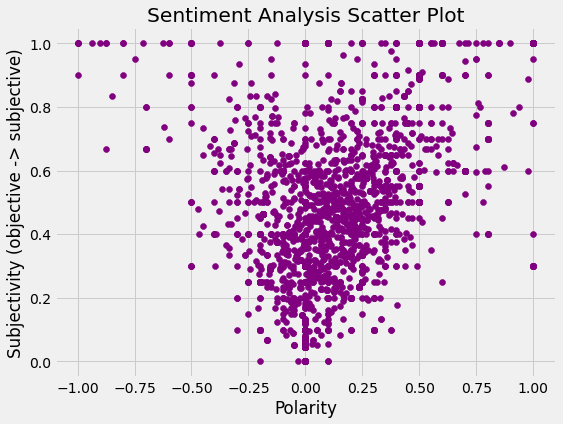

In [ ]:
#Create a scetter plot to show the subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

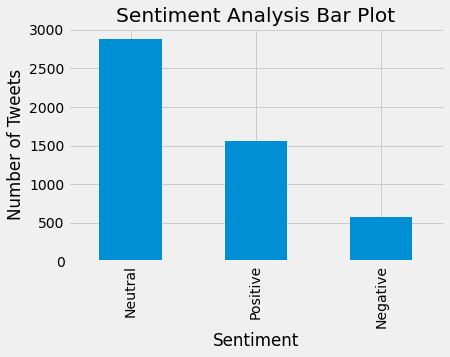

In [ ]:
#Create a bar chart to show the count of Positive, Neutral, and Negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()